# **Autoencoder**

### **Importing Libraries**

In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### **Preparing Dataset**

In [2]:
# Load MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


### **Autoencoder Model**

In [6]:
# Hyper parameters
batch_size = 128
nb_epoch = 5

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 16

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25888 (101.12 KB)
Trainable params: 25888 (101.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Training**

In [7]:
# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2557 - val_loss: 0.1864
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1706 - val_loss: 0.1564
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1502 - val_loss: 0.1434
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1420 - val_loss: 0.1381
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1379 - val_loss: 0.1349


### **Evaluation**

In [8]:
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

79/79 [==============================] - 0s 3ms/step - loss: 0.1349

Summary: Loss over the test dataset: 0.13


### **Visualize the reconstruction**

313/313 [==============================] - 1s 2ms/step


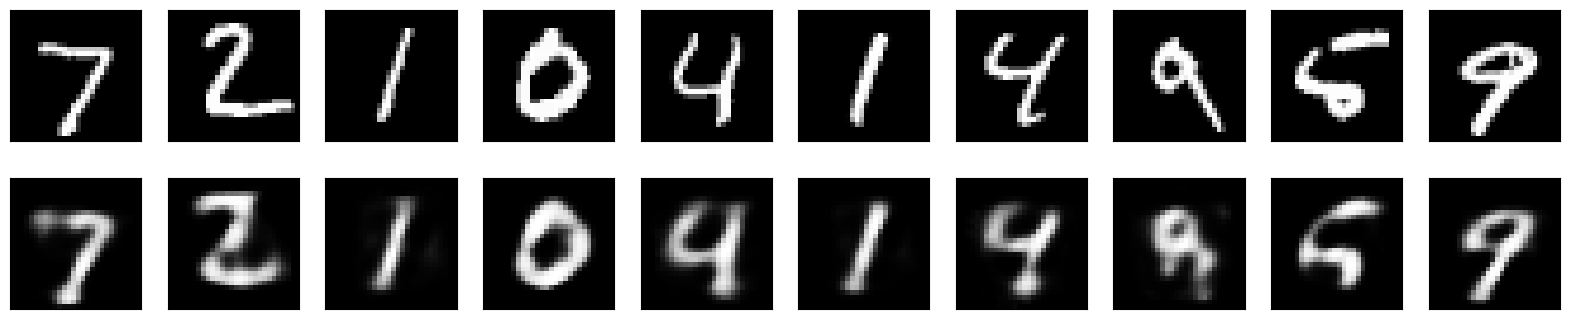

In [9]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Visualize the weights**

Shape of Hidden Layer (784, 16)
Visualization of Hidden Layer


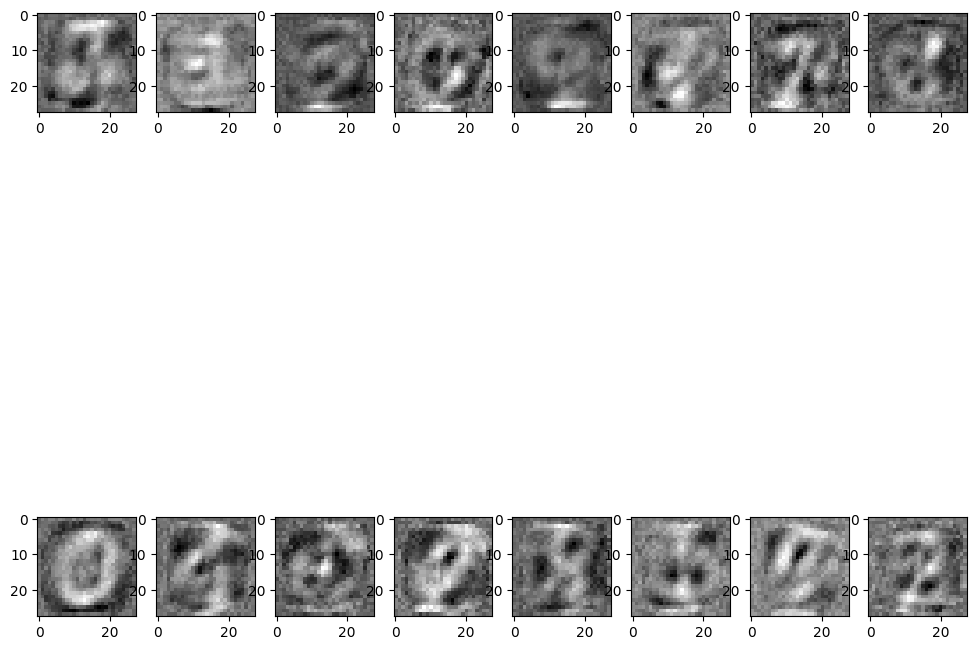

In [10]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

# **Take away**
This internal representation reflects Latent Variables;
This representation is similar to that of MLP;
Each of the nodes will look for a specific pattern in the input;
A node will get activated if input is similar to the feature it looks for;
Each node is unique and often orthogonal to each other;

### **Lets increase the number of hidden nodes**

In [13]:
nb_hidden = 128

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))
print("Training Finished!")
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 784)               101136    
                                                                 
Total params: 201616 (787.56 KB)
Trainable params: 201616 (787.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1697 - val_loss: 0.1072
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0944 - val_loss: 0.0839
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0803 - v

### **Visualize the reconstruction**

313/313 [==============================] - 1s 3ms/step


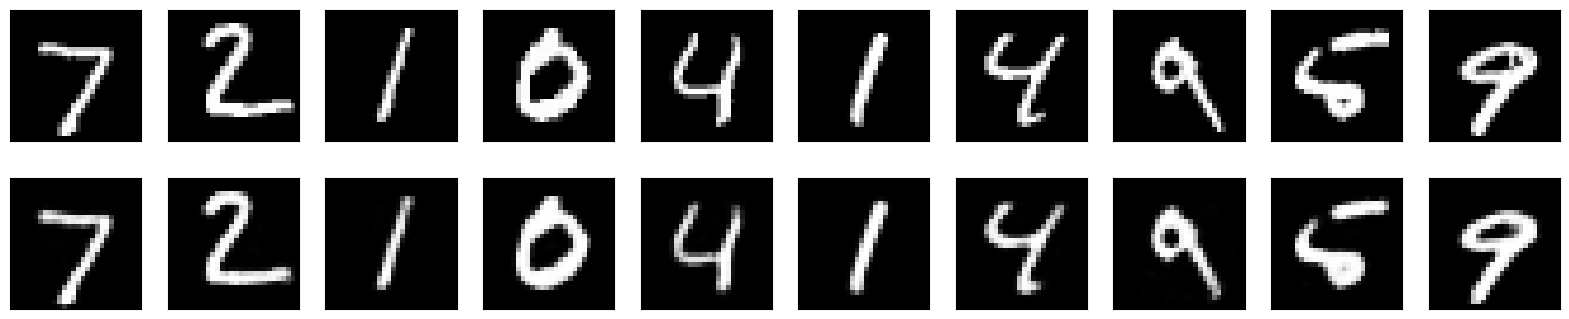

In [14]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Visualize the weights**

Shape of Hidden Layer (784, 128)
Visualization of Hidden Layer


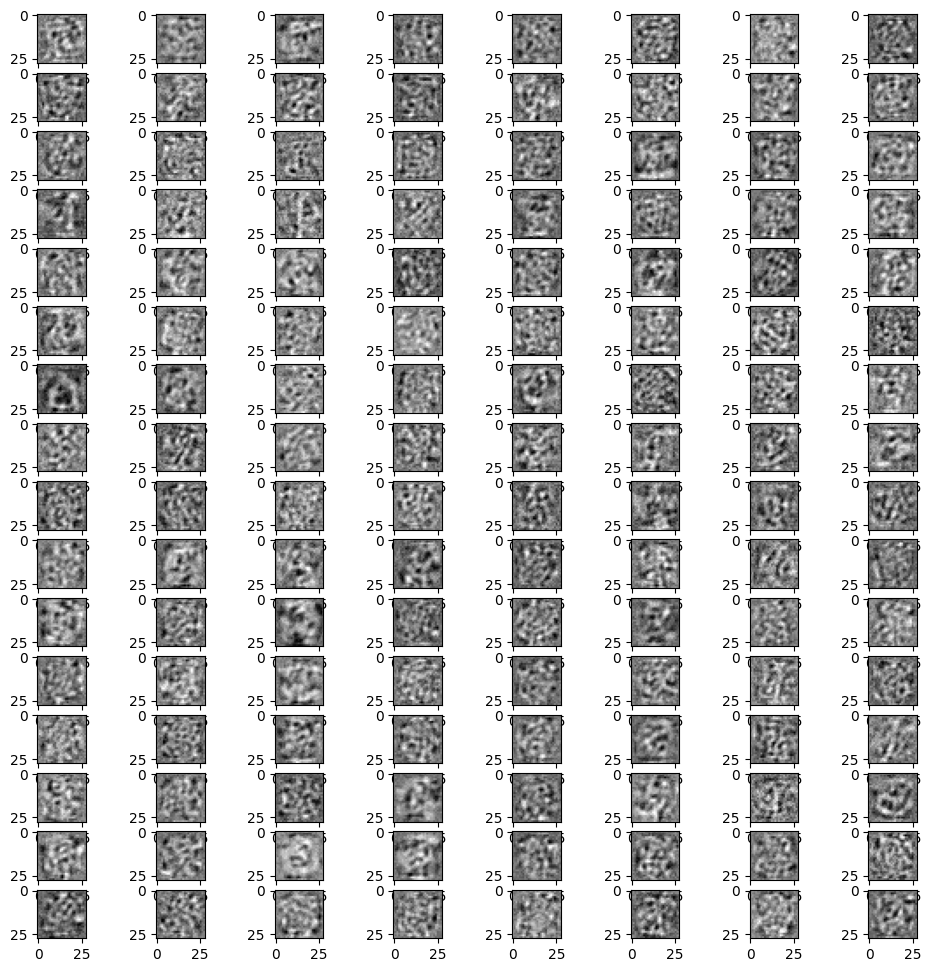

In [15]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### **Lets go for sparse!**

In [17]:
nb_hidden = 1024

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))
print("Training Finished!")
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 1024)              803840    
                                                                 
 dense_15 (Dense)            (None, 784)               803600    
                                                                 
Total params: 1607440 (6.13 MB)
Trainable params: 1607440 (6.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 22s 44ms/step - loss: 0.1093 - val_loss: 0.0718
Epoch 2/5
469/469 [==============================] - 19s 39ms/step - loss: 0.0691 - val_loss: 0.0668
Epoch 3/5
469/469 [==============================] - 18s 39ms/step - loss: 0.0664 -

### **Visualize the reconstruction**

313/313 [==============================] - 4s 12ms/step


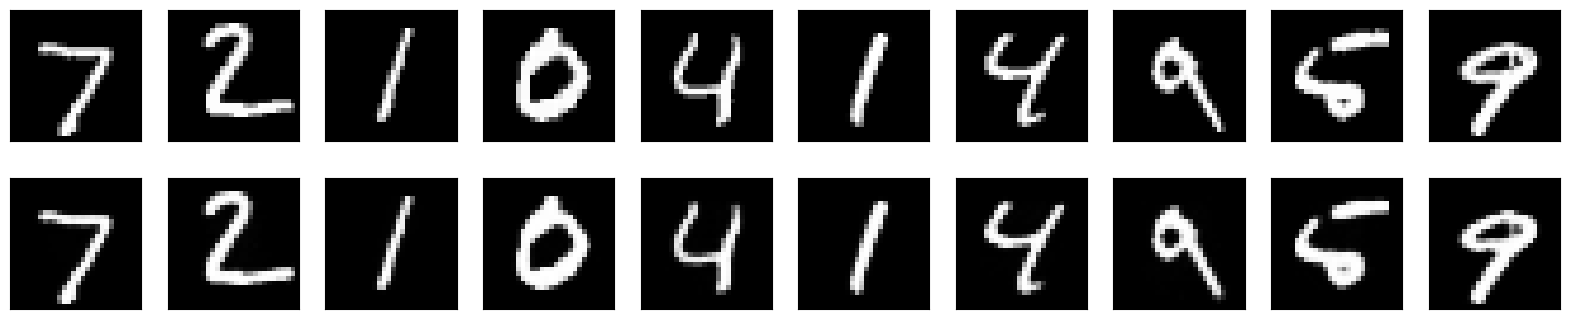

In [18]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Visualize the weights**

Shape of Hidden Layer (784, 128)
Visualization of first 128 nodes in the Hidden Layer


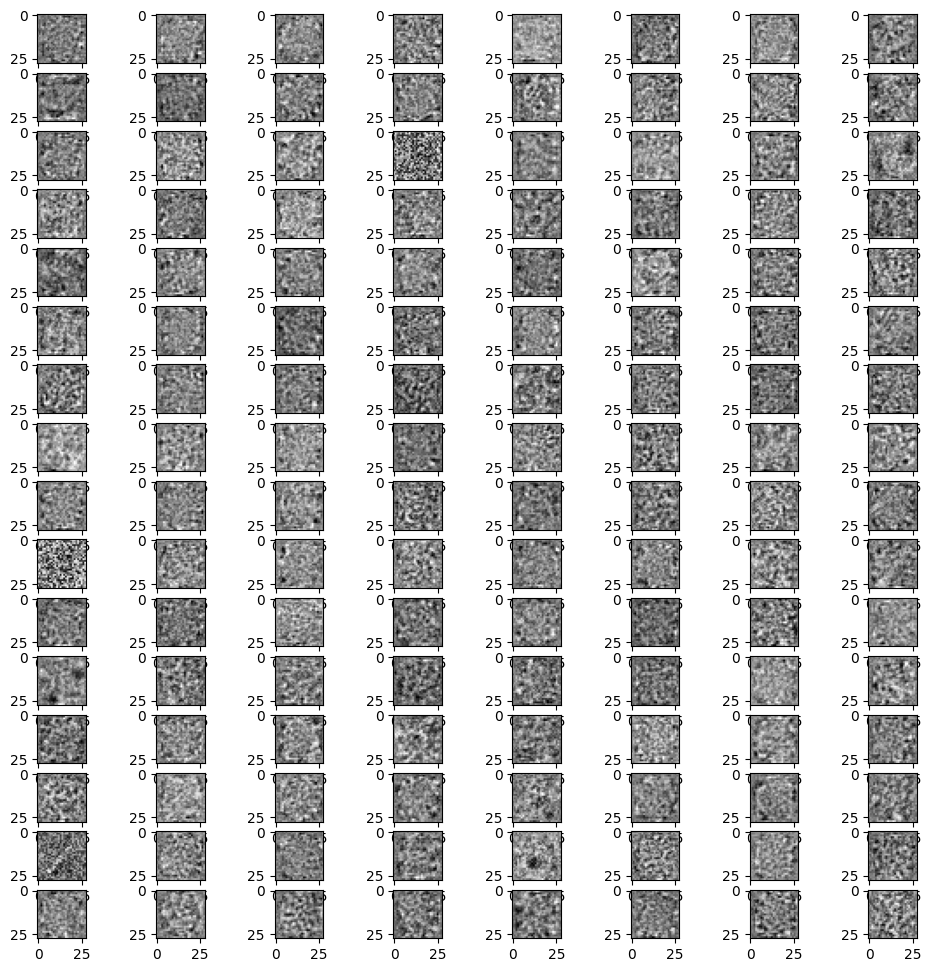

In [19]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

nb_show = 128
layer = np.array(w[1][0])
layer1 = layer[:,0:nb_show]
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of first",nb_show,"nodes in the Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_show/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

# **Denoising Autoencoder**

### **Adding noise**

In [20]:
# Add random noise
corruption_level = 0.3

x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


### **Denoising Autoencoder**

In [26]:
# Hyper parameters
batch_size = 128
nb_epoch = 5

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 32

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_20 (Dense)            (None, 32)                25120     
                                                                 
 dense_21 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Training**

In [28]:
# Train
autoencoder.fit(x_train_noisy, x_train,
                epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1119 - val_loss: 0.1101
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1109 - val_loss: 0.1092
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1103 - val_loss: 0.1088
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1099 - val_loss: 0.1086
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1096 - val_loss: 0.1083


### **Evaluation**

In [29]:
# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

79/79 [==============================] - 0s 6ms/step - loss: 0.1083

Summary: Loss over the test dataset: 0.11


### **Visualize the reconstruction**

313/313 [==============================] - 1s 2ms/step


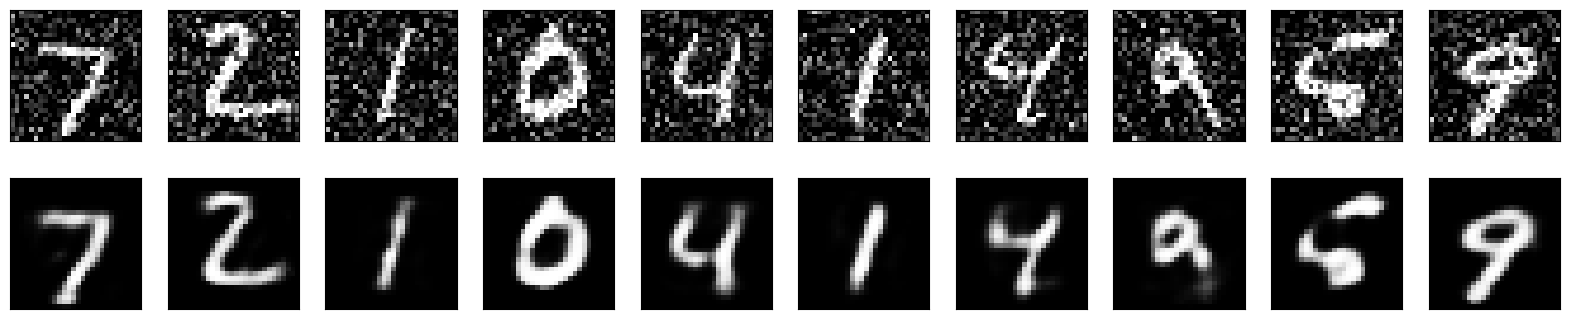

In [30]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Visualize the weights**

Shape of Hidden Layer (784, 32)
Visualization of Hidden Layer


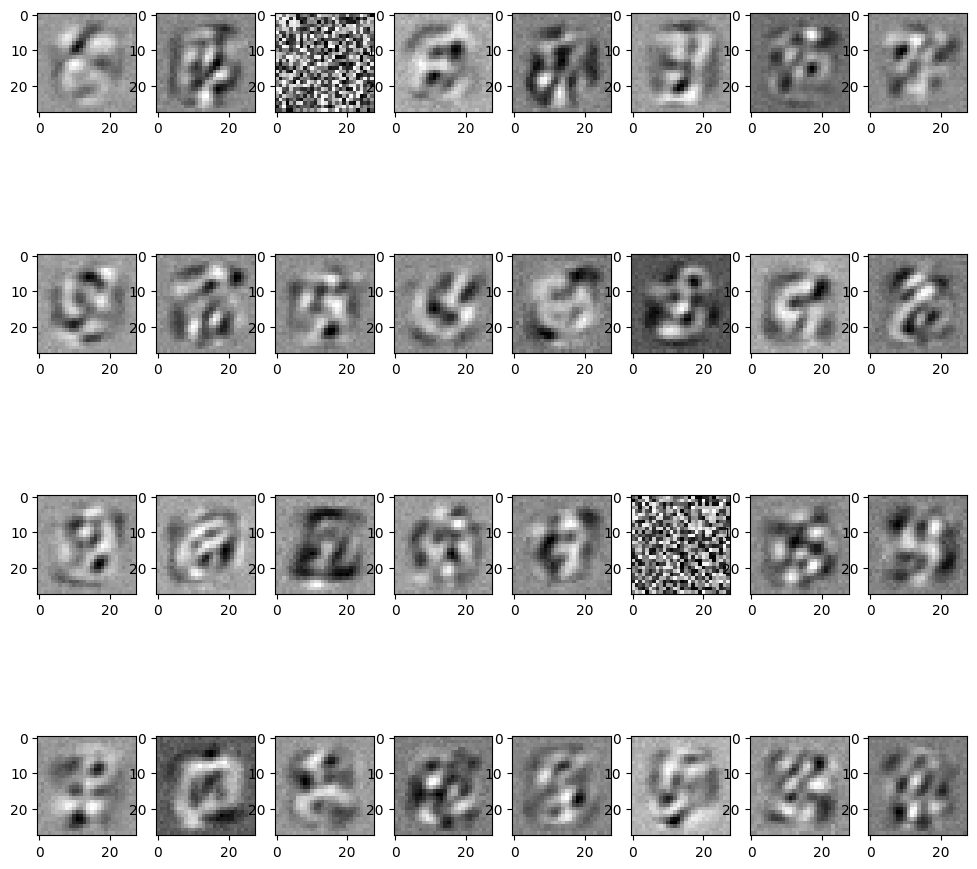

In [31]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### **Lets corrupt the data too much and see what happpens**

In [32]:
# Add random noise
corruption_level = 0.7

x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


### **Model Training and Evaluation**

In [36]:
# Hyper parameters
batch_size = 128
nb_epoch = 5

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 32

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train_noisy, x_train,
                epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_28 (Dense)            (None, 32)                25120     
                                                                 
 dense_29 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2475 - val_loss: 0.1948
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1838 - val_loss: 0.1727
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1676 - val_l

### **Visualize the reconstruction**

313/313 [==============================] - 1s 2ms/step


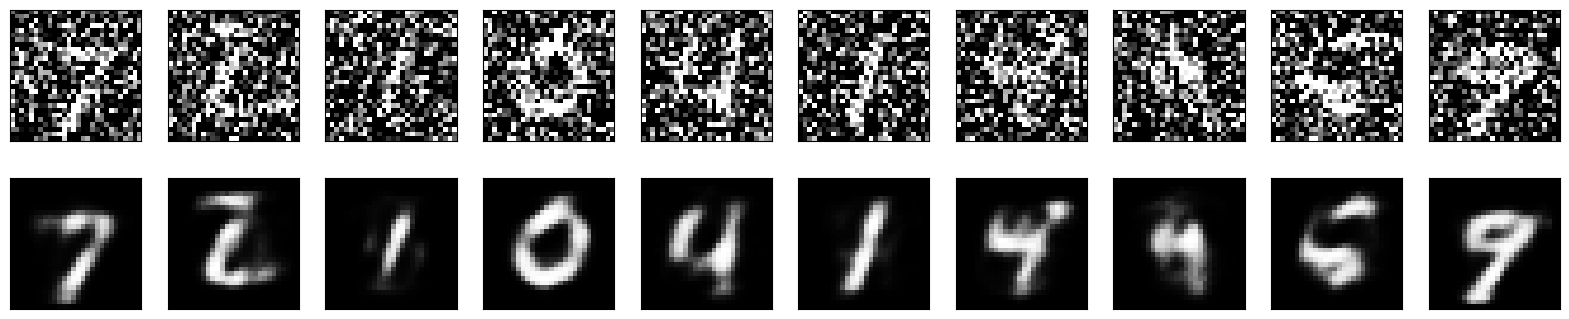

In [37]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Visualize the weights**

Shape of Hidden Layer (784, 32)
Visualization of Hidden Layer


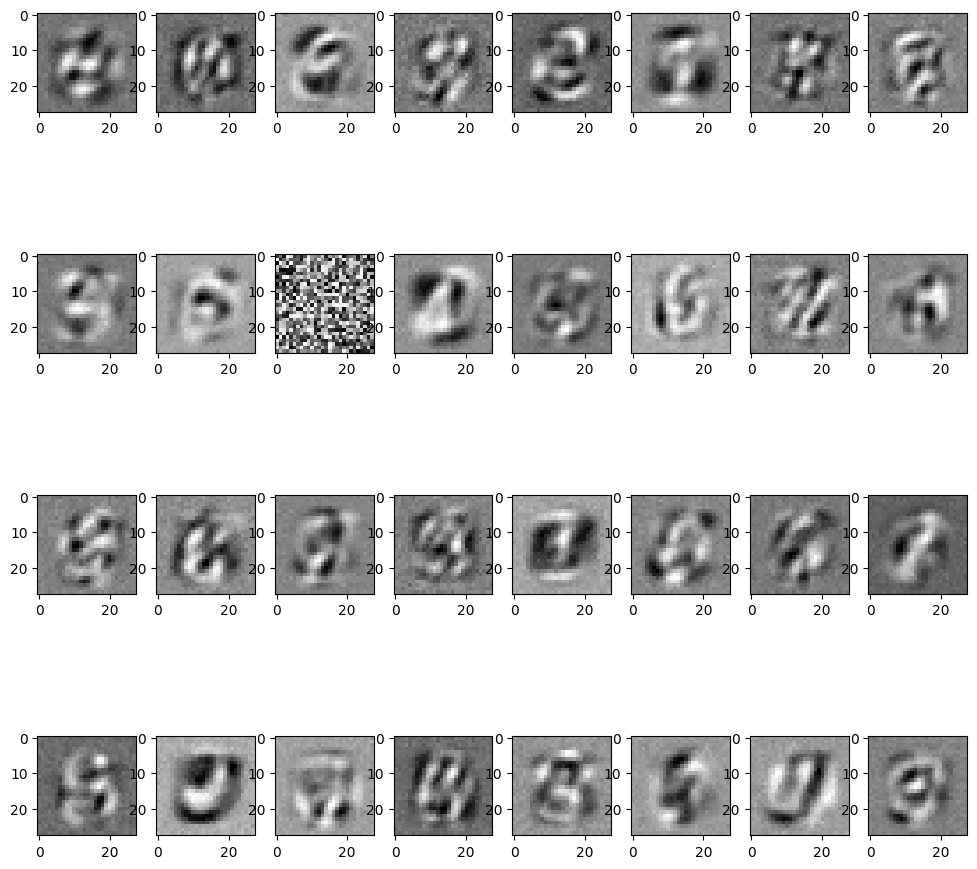

In [38]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [39]:
# Add random noise
corruption_level = 0.3

x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

nb_hidden = 1024

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))
print("Training Finished!")
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

(60000, 784)
(10000, 784)
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_30 (Dense)            (None, 1024)              803840    
                                                                 
 dense_31 (Dense)            (None, 784)               803600    
                                                                 
Total params: 1607440 (6.13 MB)
Trainable params: 1607440 (6.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 23s 48ms/step - loss: 0.1093 - val_loss: 0.0719
Epoch 2/5
469/469 [==============================] - 27s 58ms/step - loss: 0.0692 - val_loss: 0.0668
Epoch 3/5
469/469 [==============================] - 18s

### **Visualize the reconstruction**

313/313 [==============================] - 3s 8ms/step


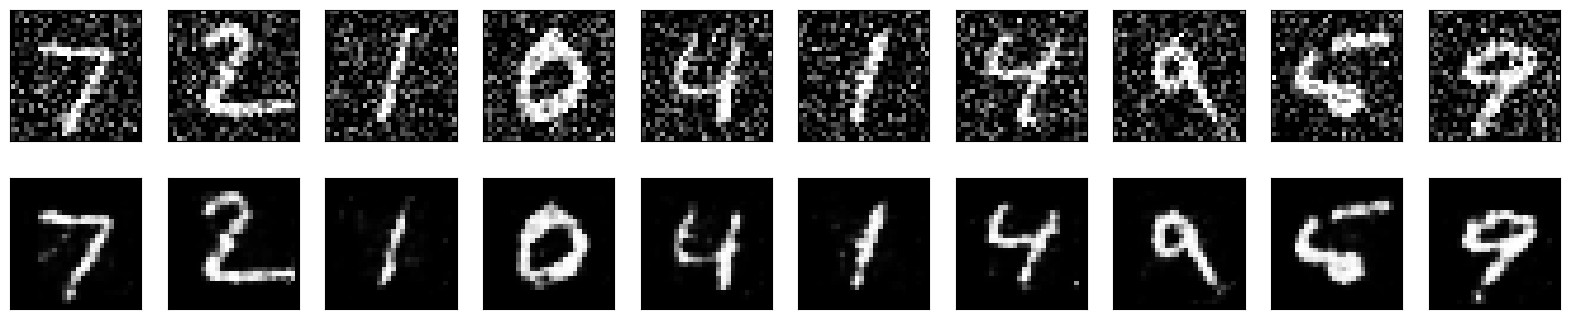

In [40]:
# Decode test images
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()